In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
from sklearn.linear_model import LinearRegression

In [54]:
def collect(name, period):
    data = yf.download(name, period = period, interval = '1d') 
    data.rename(columns={'Adj Close': name}, inplace=True)
    data = data[name].dropna()
    return data 



#names = ["BTC-USD","XRP-USD","ETH-USD","BCH-USD","ADA-USD","XEM-USD","LTC-USD","TRX-USD","XLM-USD","MIOTA-USD","DASH-USD","EOS-USD",
#"XMR-USD","NEO-USD","QTUM-USD","BTG-USD","SC-USD","BCN-USD","ZEC-USD","XVG-USD","OMG-USD","BTS-USD","PPT-USD","DOGE-USD","DCN-USD","BNB-USD","SNT-USD","LINK-USD","USDC-USD","VET-USD"]
names =["AGRS-USD","ARCO-USD","ASAFE-USD","BSTY-USD","BTA-USD","CF-USD","COVAL-USD","DCR-USD","ETH-USD","EVIL-USD","EXCL-USD","GLM-USD",
"GRS-USD","IXC-USD","KOBO-USD","KRB-USD","LANA-USD","LTC-USD","MEME-USD","NEVA-USD","NMC-USD","NYC-USD","PAK-USD","PIVX-USD","PLU-USD","SBD-USD","SFT-USD","SLS-USD","SMLY-USD","SYS-USD",
"TX-USD","UNO-USD","VAL-USD","XLM-USD","XMR-USD","XPD-USD","XRA-USD","XRP-USD","XWC-USD","ZYD-USD"]
all_data = []


for name in names:
    data = collect(name, period='4y')
    all_data.append(data)    

final_table = pd.concat(all_data, axis=1).reindex(data.index)

print(final_table)
#final_table.to_csv("pricedata.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [63]:
df = final_table
# Create 20 days exponential moving average column
for name in names:
    df[name + '20_EMA'] = final_table[name].ewm(span = 10, adjust = False).mean()
    df[name + '50_EMA'] = final_table[name].ewm(span = 100, adjust = False).mean()  
    df[name + 'Signal'] = 0.0
    df[name + 'Signal'] = np.where(df[name +'20_EMA'] > df[name +'50_EMA'], 1.0, -1.0)
    df[name + 'Position'] = df[name + 'Signal'].diff()
# create a new column 'Signal' such that if 20-day EMA is greater   # than 50-day EMA then set Signal as 1 else 0

In [64]:
for name in names:  
    df[name + 'Signal'] = 0.0  
    df[name + 'Signal'] = np.where(df[name +'20_EMA'] > df[name +'50_EMA'], 1.0, 0.0)
    df[name + 'Position'] = df[name + 'Signal'].diff()
#if the position is -1, meaning we obtain the shorting signal and we need to switch from long to short on the next day
#if the position is 1, meaning we obtain the longing signal and we need to switch from short to long on the next day
#    df[name + 'Tradingday'] = df[name + 'Position'].diff()

In [65]:
sig_df = []
for name in names:
    data = df[[name, name + 'Position']]
    sig_df.append(data)
dfdata = pd.concat(sig_df, axis=1).astype(np.float32)

In [66]:
dfdata
#dfdata.to_csv("signalgenerator.csv")

AGRS-USD  AGRS-USDPosition  ARCO-USD  ARCO-USDPosition  ASAFE-USD  \
Date                                                                            
2018-11-29       NaN               NaN  0.040049               NaN   0.012902   
2018-11-30       NaN               0.0  0.037492               0.0   0.012714   
2018-12-01       NaN               0.0  0.037331               0.0   0.012305   
2018-12-02       NaN               0.0  0.037453               0.0   0.013366   
2018-12-03       NaN               0.0  0.034079               0.0   0.011012   
...              ...               ...       ...               ...        ...   
2022-11-24  0.138187               0.0  0.025862               0.0   0.005479   
2022-11-25  0.133006               0.0  0.026791               0.0   0.003635   
2022-11-26  0.108408               0.0  0.026675               0.0   0.003622   
2022-11-27  0.121939               0.0  0.027880               0.0   0.003782   
2022-11-29  0.124392               0.0  0.028326               0.0   0.003790   

            ASAFE-USDPosition  BSTY-USD  BSTY-USDPosition   BTA-USD  \
Date                                                                  
2018-11-29                NaN  0.001854               NaN  0.018909   
2018-11-30                0.0  0.002167               1.0  0.034201   
2018-12-01                0.0  0.002188               0.0  0.030672   
2018-12-02                0.0  0.002153               0.0  0.016310   
2018-12-03                0.0  0.001977               0.0  0.013509   
...                       ...       ...               ...       ...   
2022-11-24                0.0  0.004801               0.0  0.080781   
2022-11-25                0.0  0.003456               0.0  0.080379   
2022-11-26                0.0  0.004541               0.0  0.080099   
2022-11-27                0.0  0.004649               0.0  0.013041   
2022-11-29                0.0  0.003806               0.0  0.012904   

            BTA-USDPosition  ...   XPD-USD  XPD-USDPosition   XRA-USD  \
Date                         ...                                        
2018-11-29              NaN  ...  0.014247              NaN  0.000696   
2018-11-30              1.0  ...  0.014725              1.0  0.000682   
2018-12-01              0.0  ...  0.015394              0.0  0.000713   
2018-12-02              0.0  ...  0.015194              0.0  0.000662   
2018-12-03              0.0  ...  0.014849              0.0  0.000620   
...                     ...  ...       ...              ...       ...   
2022-11-24              0.0  ...  0.010129              0.0  0.000166   
2022-11-25              0.0  ...  0.010078              0.0  0.000165   
2022-11-26              0.0  ...  0.010043              0.0  0.000165   
2022-11-27              0.0  ...  0.008387              0.0  0.000164   
2022-11-29              0.0  ...  0.008405             -1.0  0.000165   

            XRA-USDPosition   XRP-USD  XRP-USDPosition   XWC-USD  \
Date                                                               
2018-11-29              NaN  0.379562              NaN  0.046210   
2018-11-30              0.0  0.362455              0.0  0.042429   
2018-12-01              1.0  0.372906              0.0  0.044327   
2018-12-02             -1.0  0.367627              0.0  0.043991   
2018-12-03              0.0  0.348754              0.0  0.042896   
...                     ...       ...              ...       ...   
2022-11-24              0.0  0.401992              0.0  0.054883   
2022-11-25              0.0  0.408412              0.0  0.054733   
2022-11-26              0.0  0.396629              0.0  0.055123   
2022-11-27              0.0  0.396821              0.0  0.055499   
2022-11-29              0.0  0.401111              0.0  0.057239   

            XWC-USDPosition   ZYD-USD  ZYD-USDPosition  
Date                                                    
2018-11-29              NaN  0.001968              NaN  
2018-11-30              0.0 

In [80]:
#set trading days for each cryptocurrency
#for name in names: 
#    df[name + 'trading day'] = 'sustain'
#    if (df[name + 'Signal'] == 0.0).any() & (df[name + 'Signal'].shift(1) == 1.0).any():
#        df[name + 'trading day'] = 'Start to long'
#    elif (df[name + 'Signal'] == 1.0).any() & (df[name + 'Signal'].shift(1) == 0.0).any():
#        df[name + 'trading day'] = 'Start to short'

        

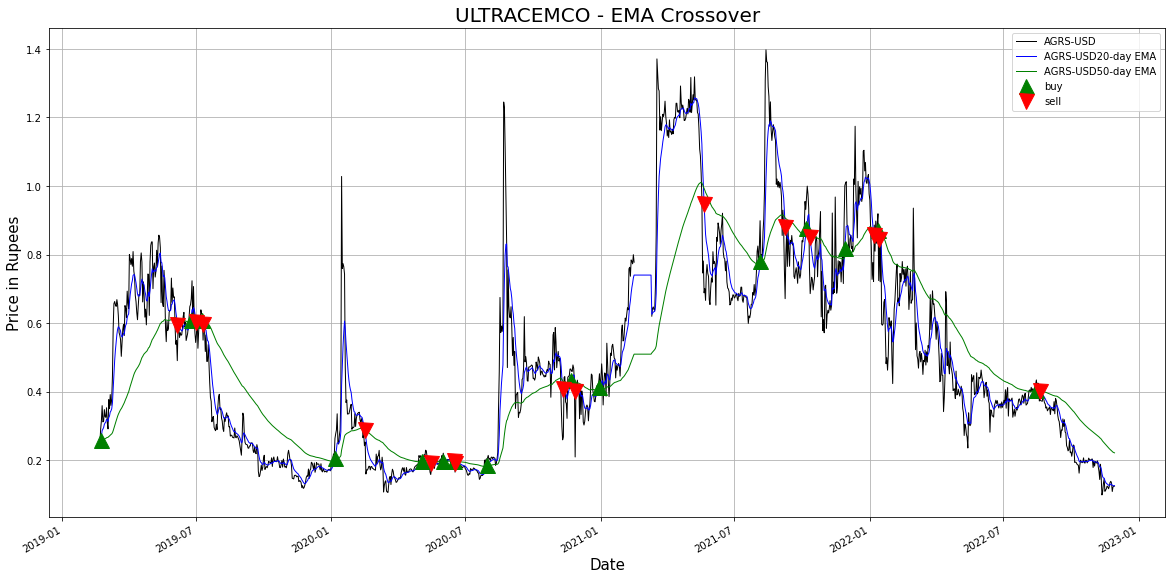

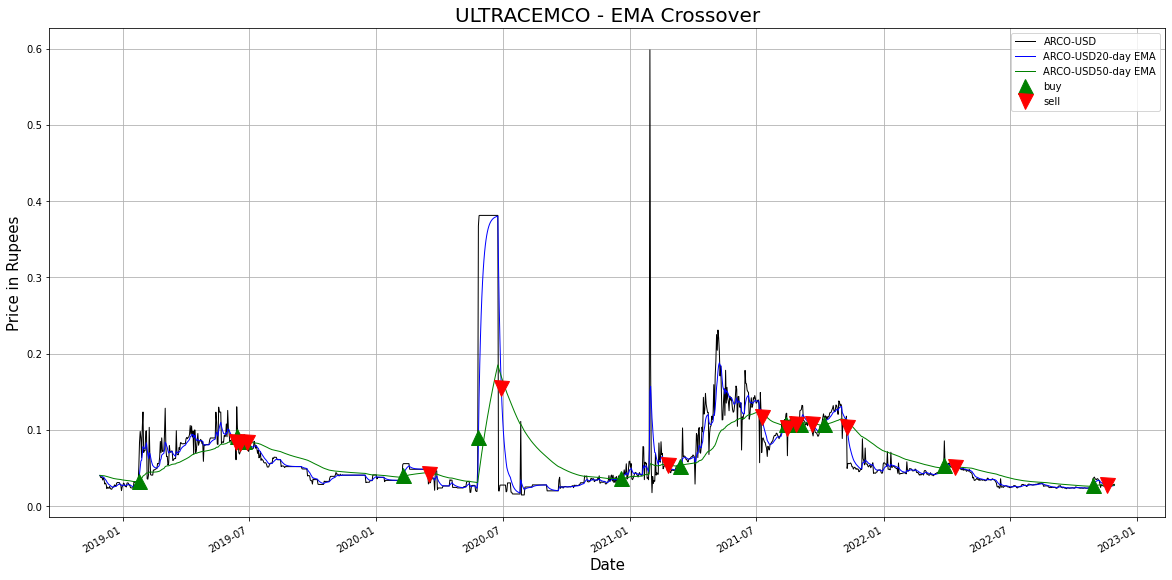

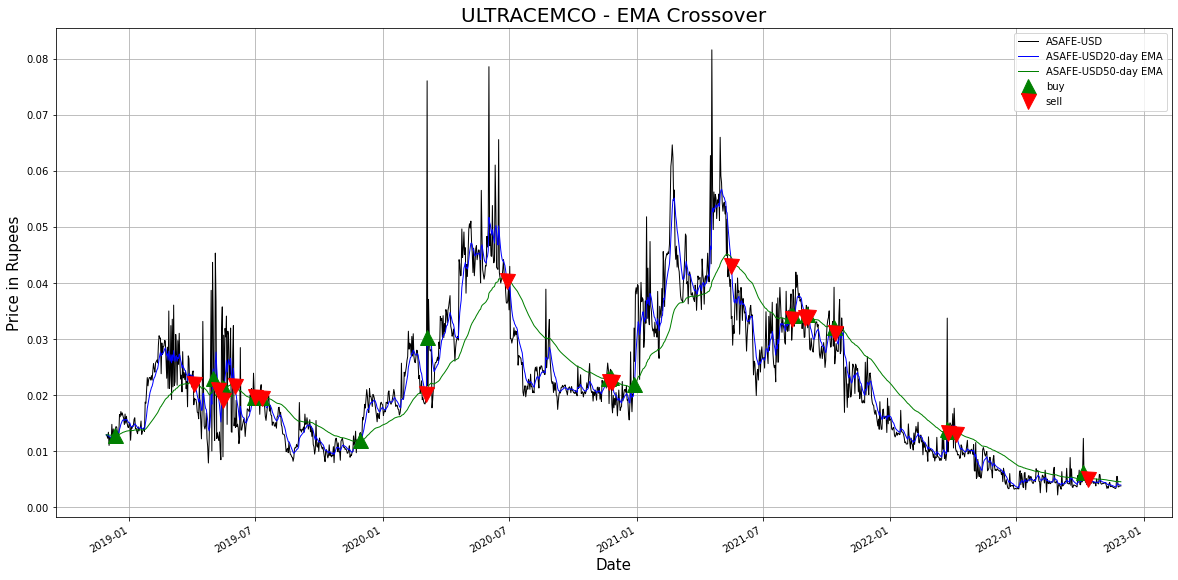

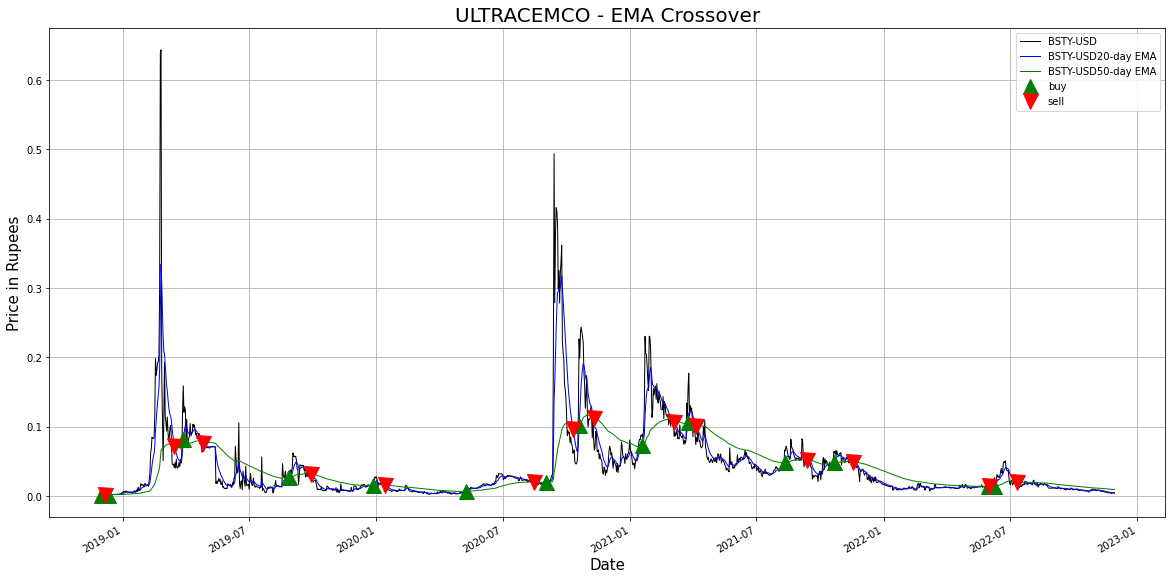

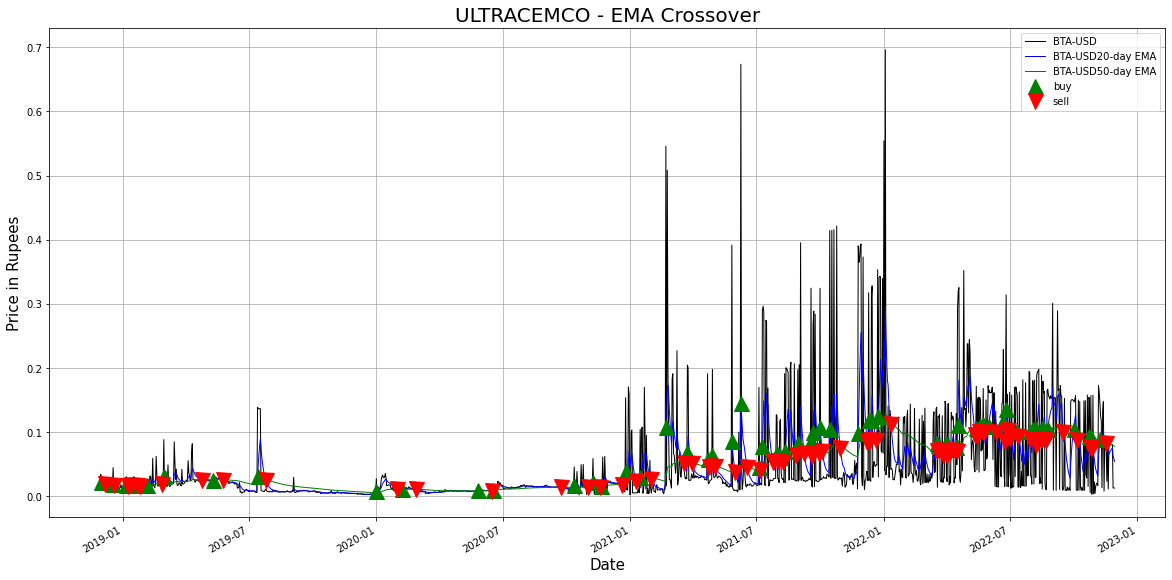

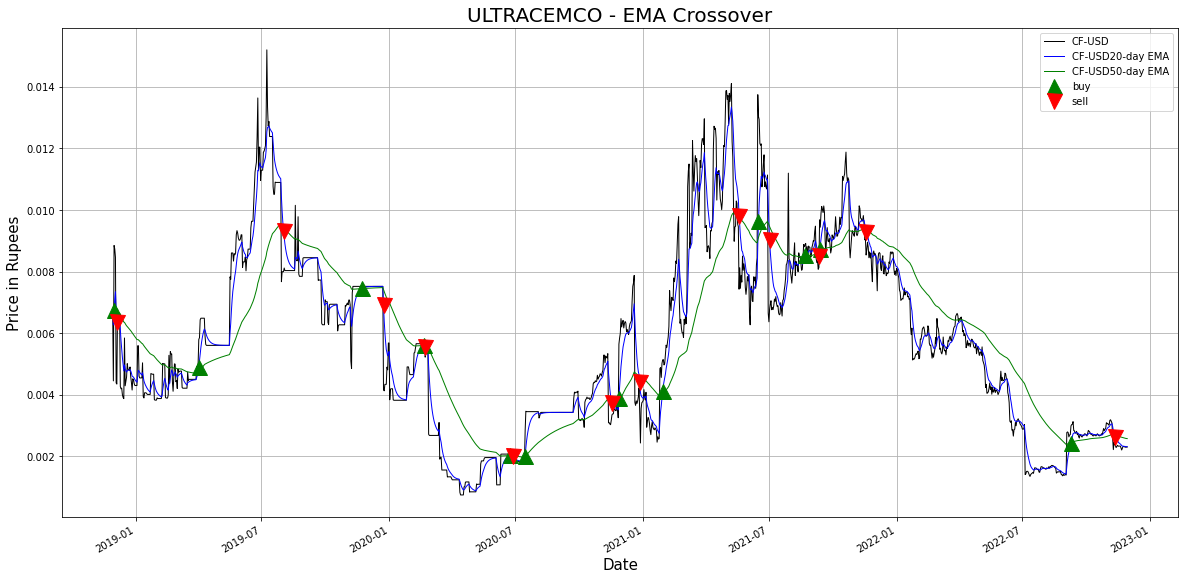

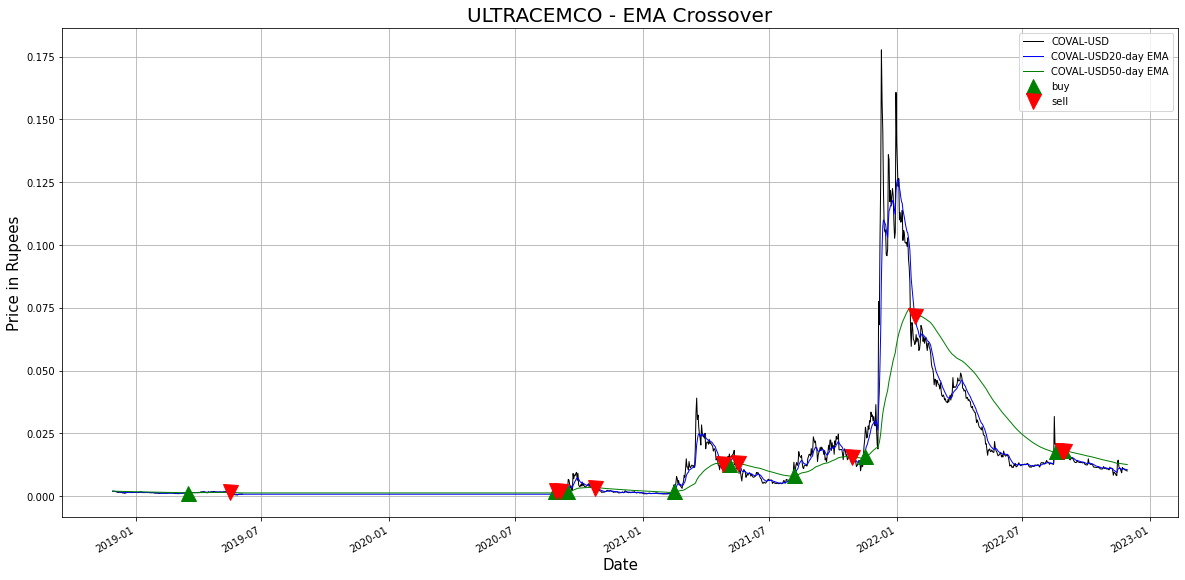

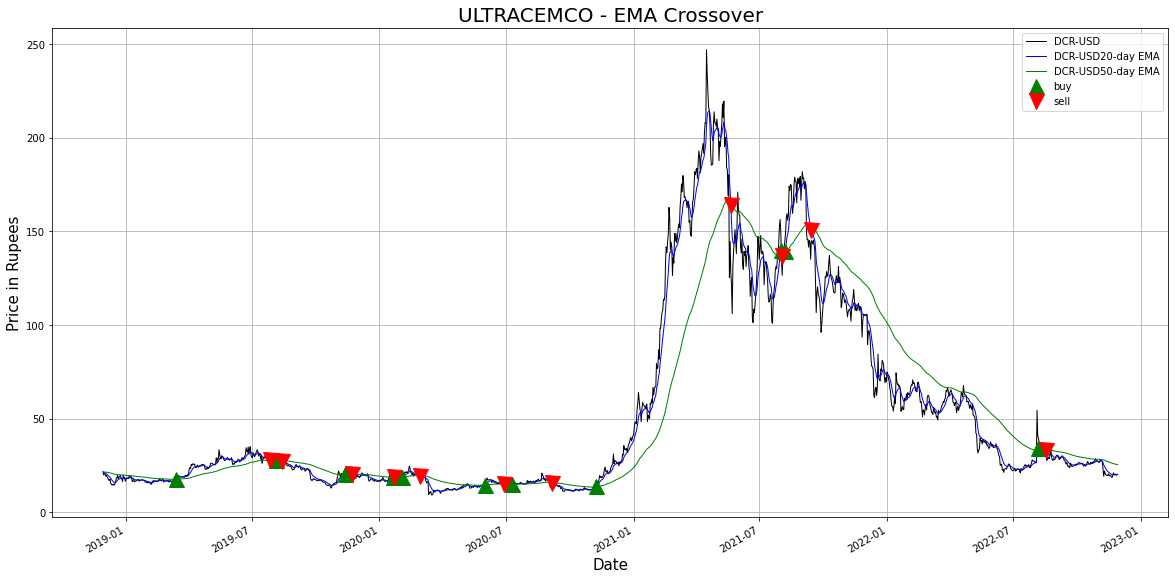

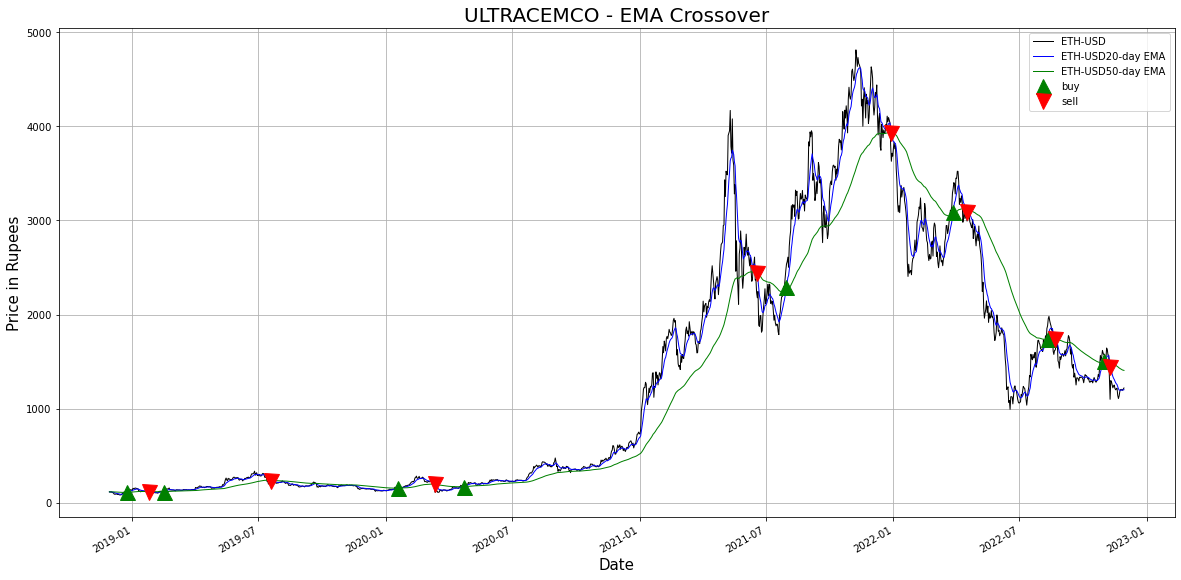

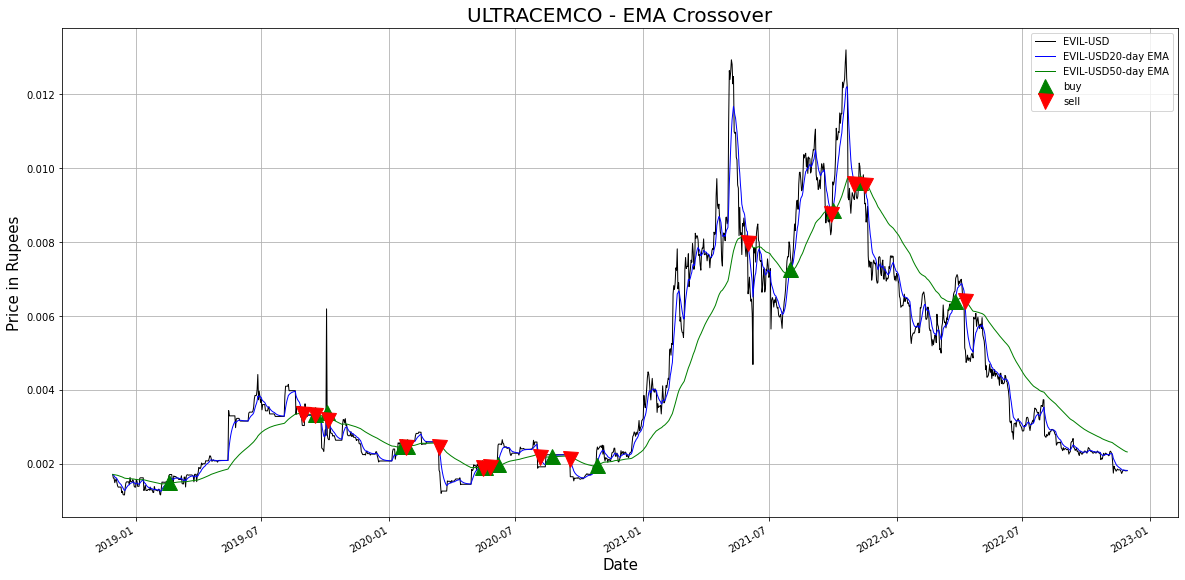

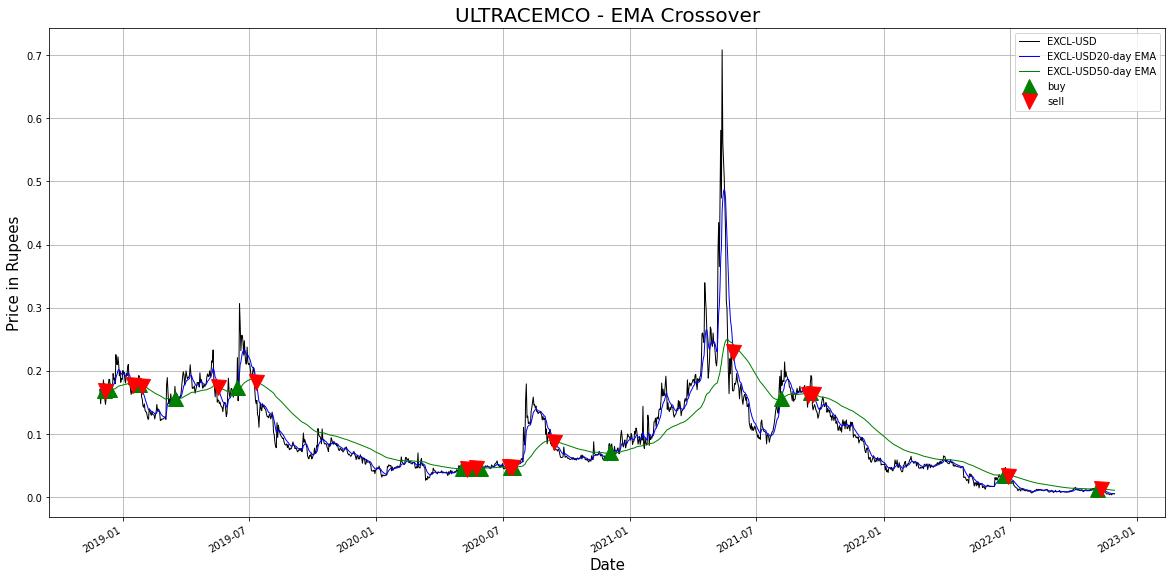

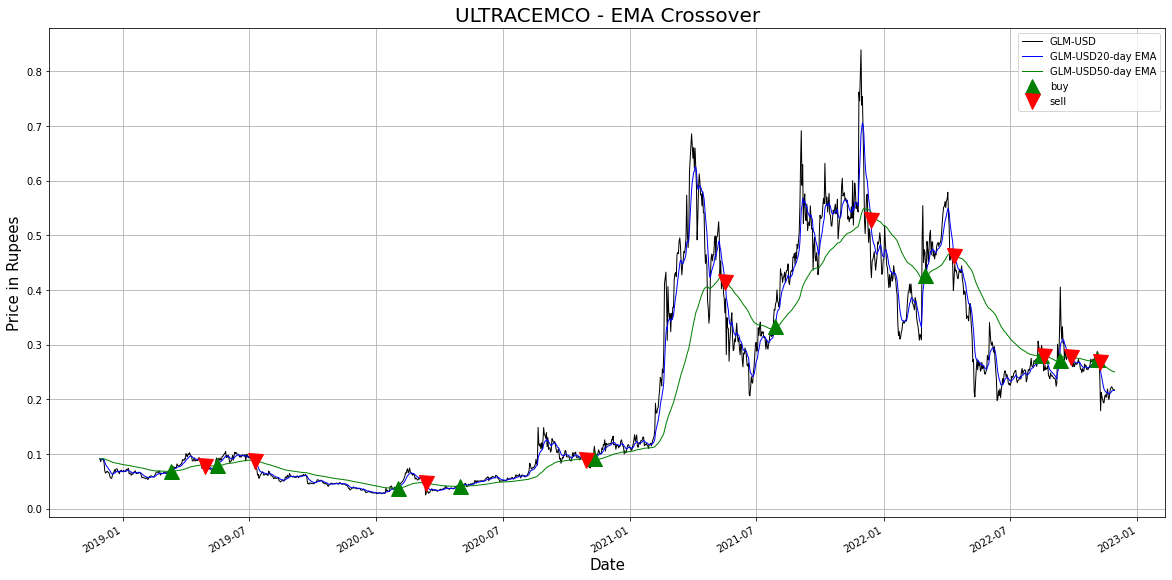

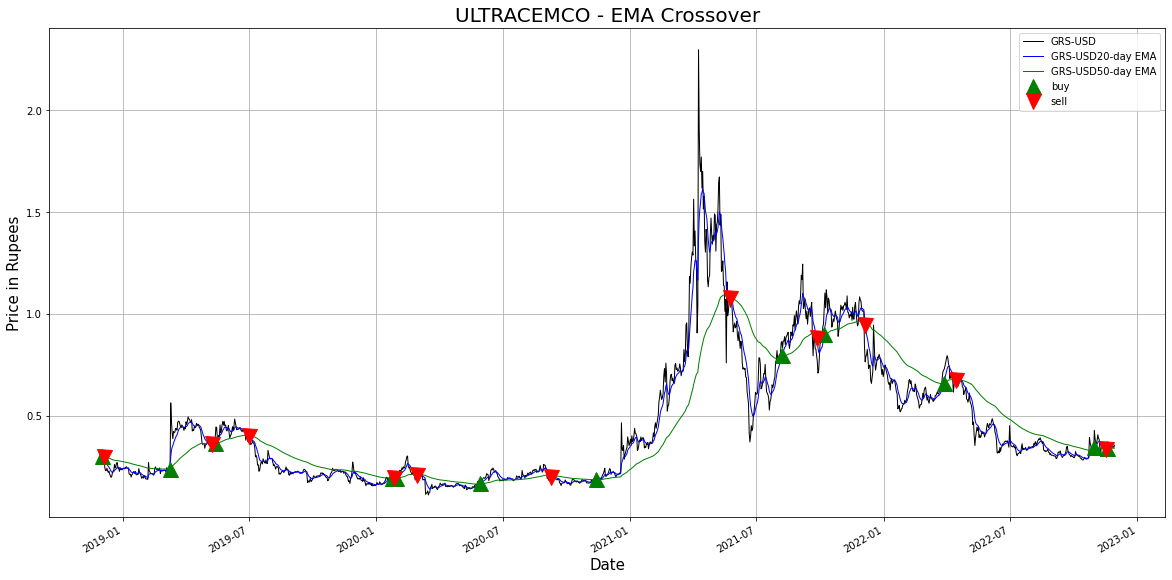

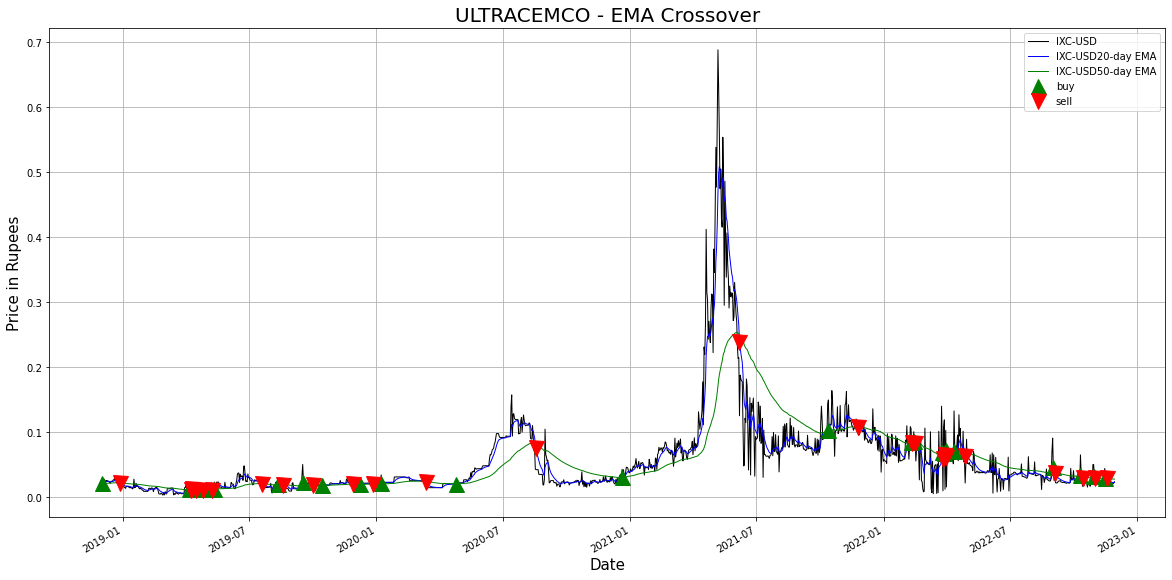

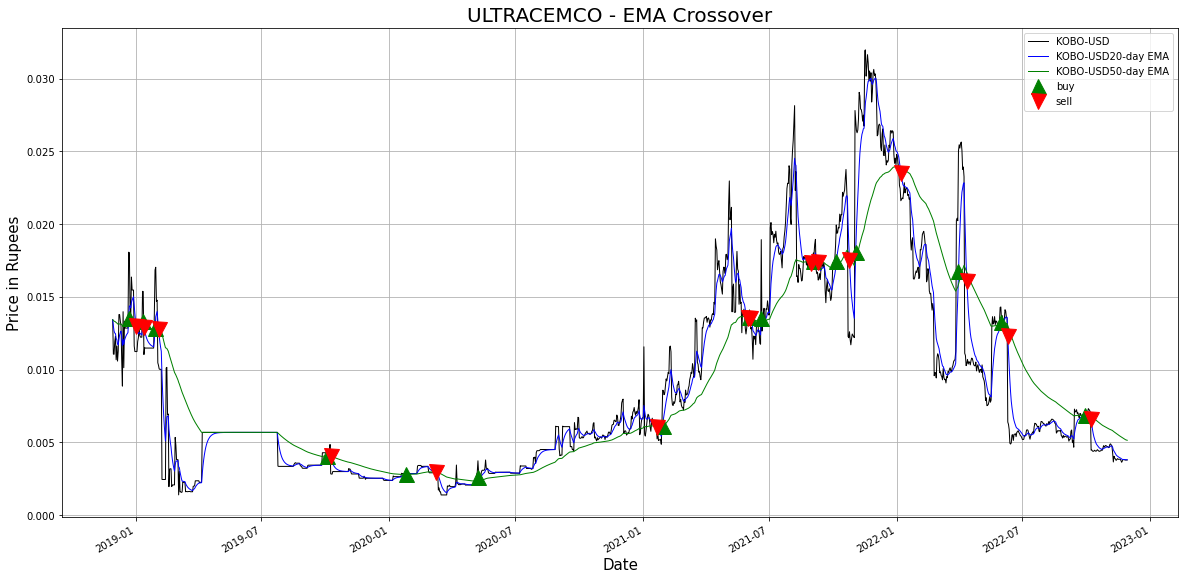

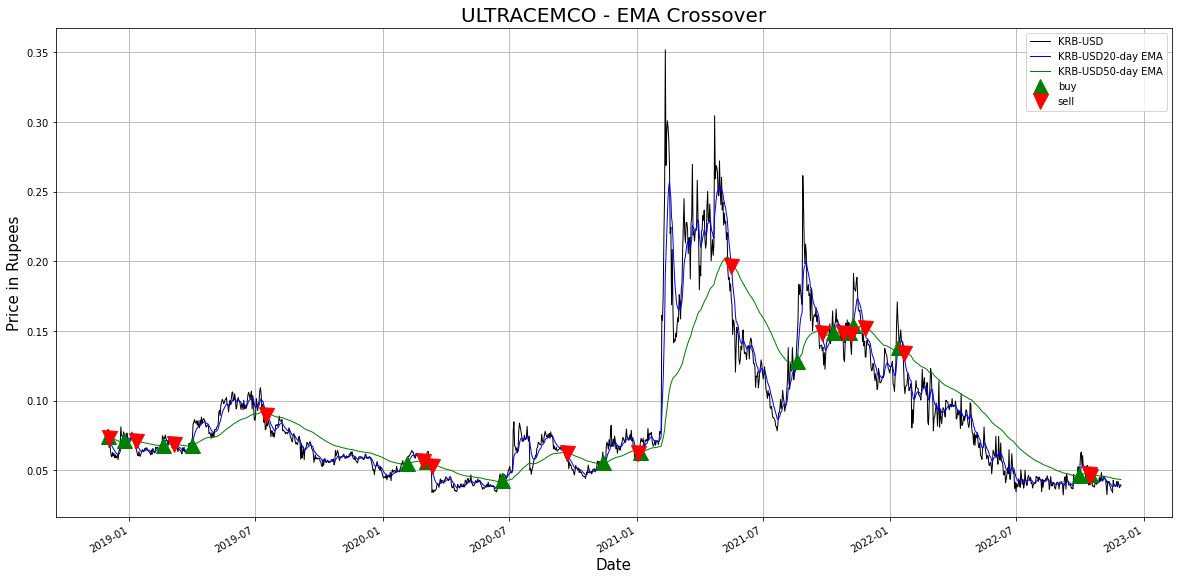

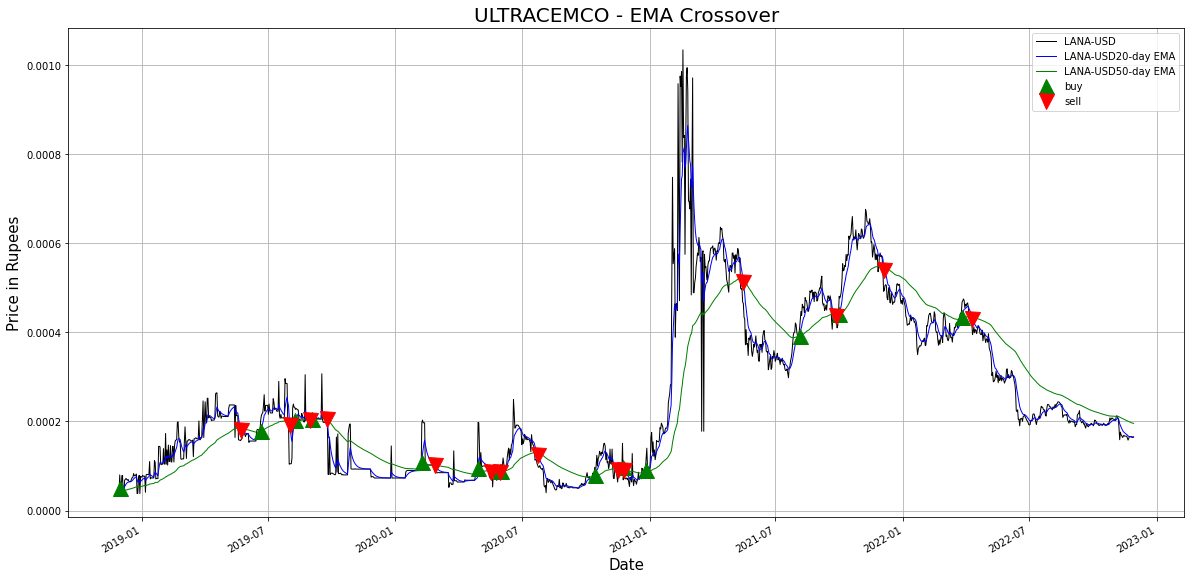

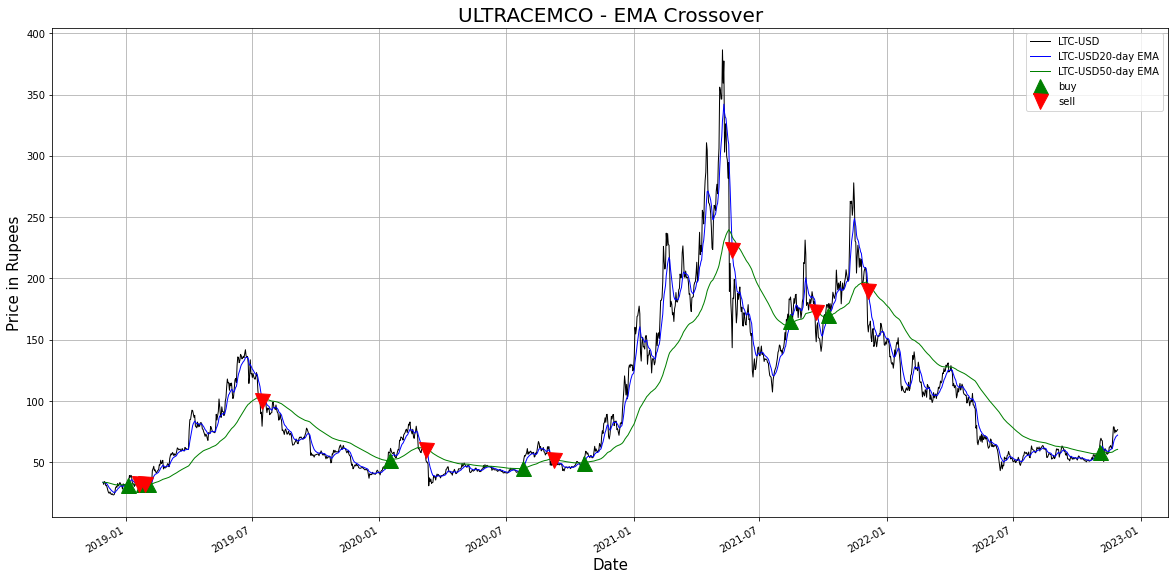

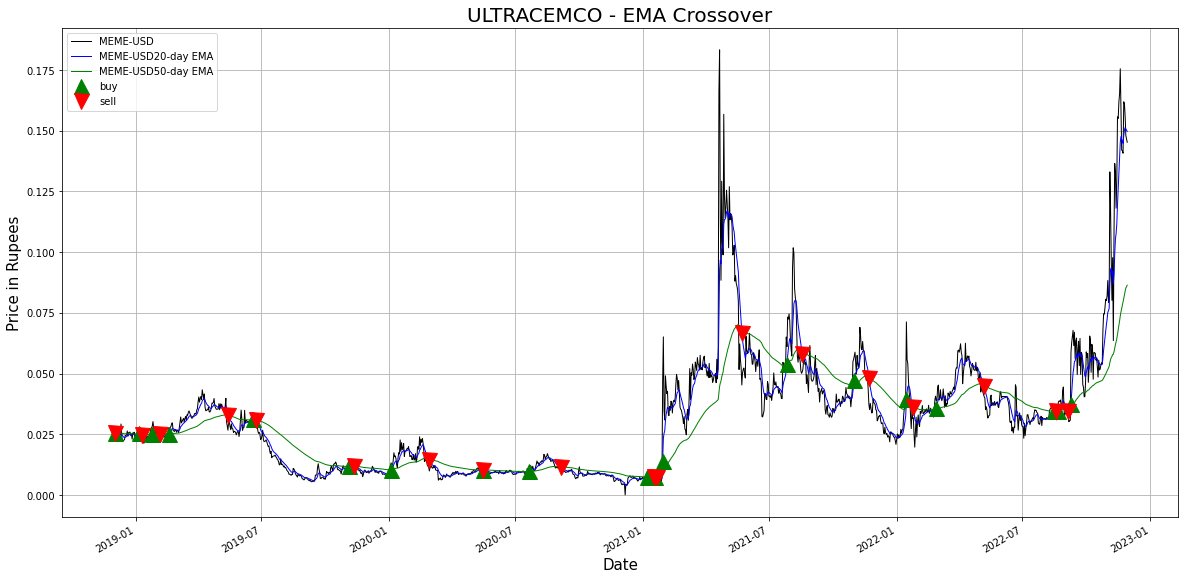

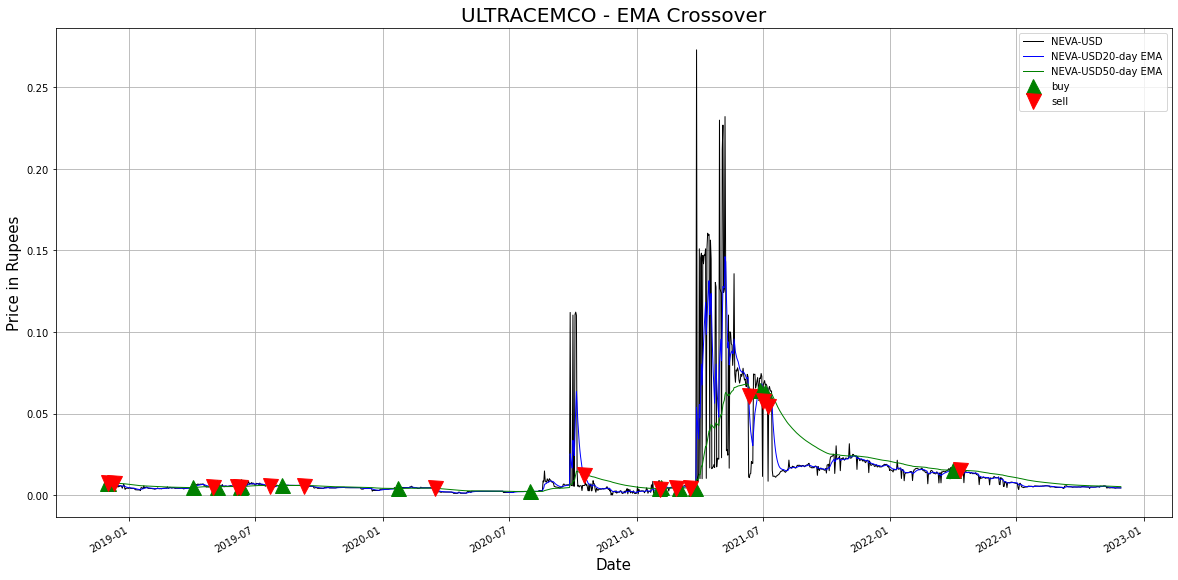

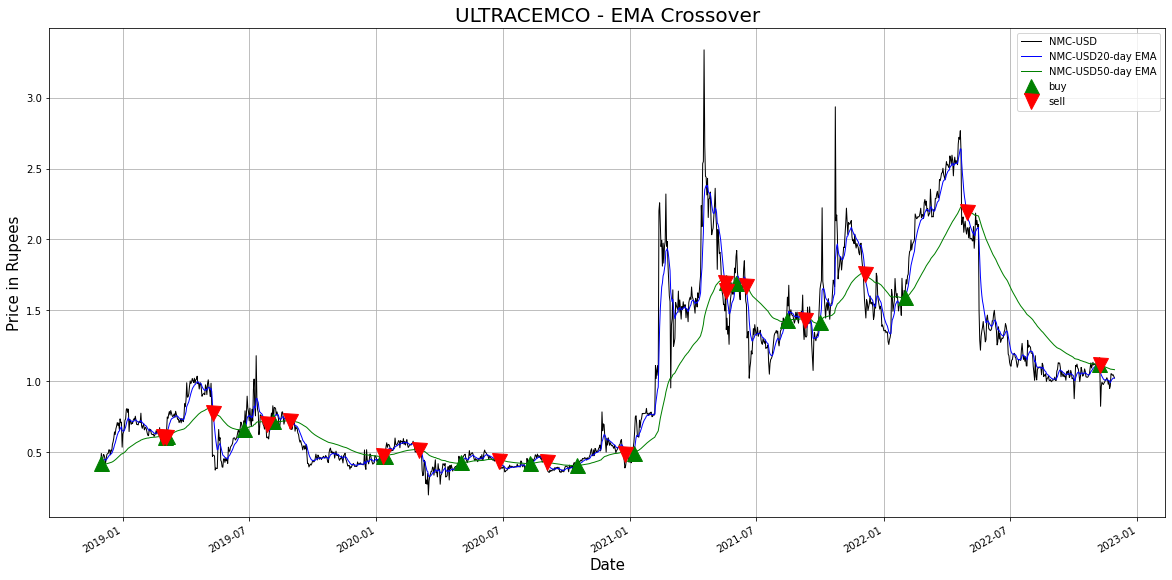

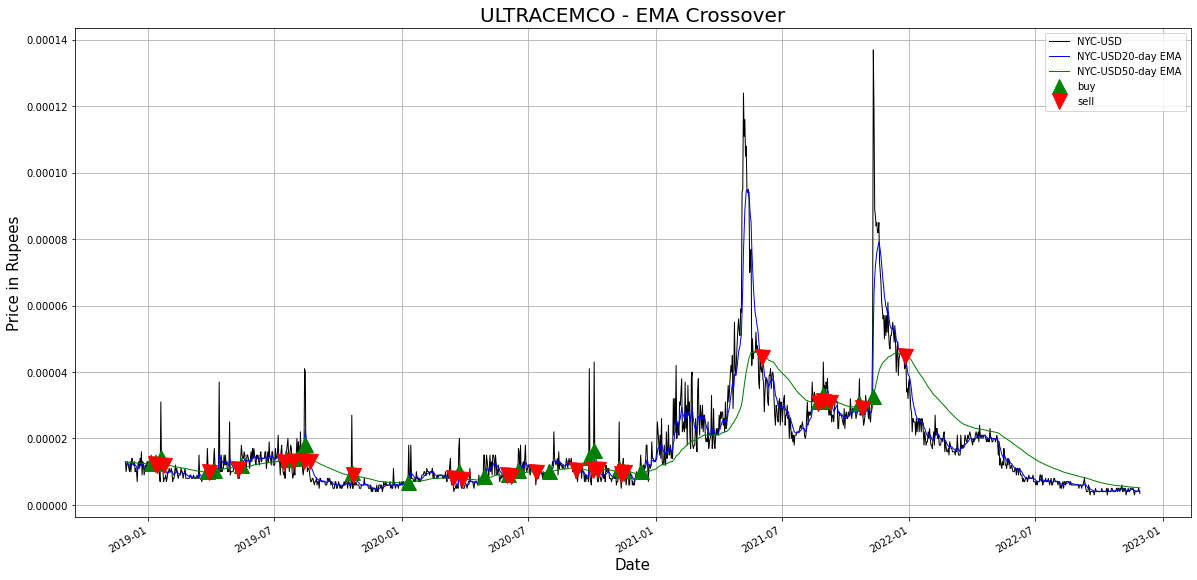

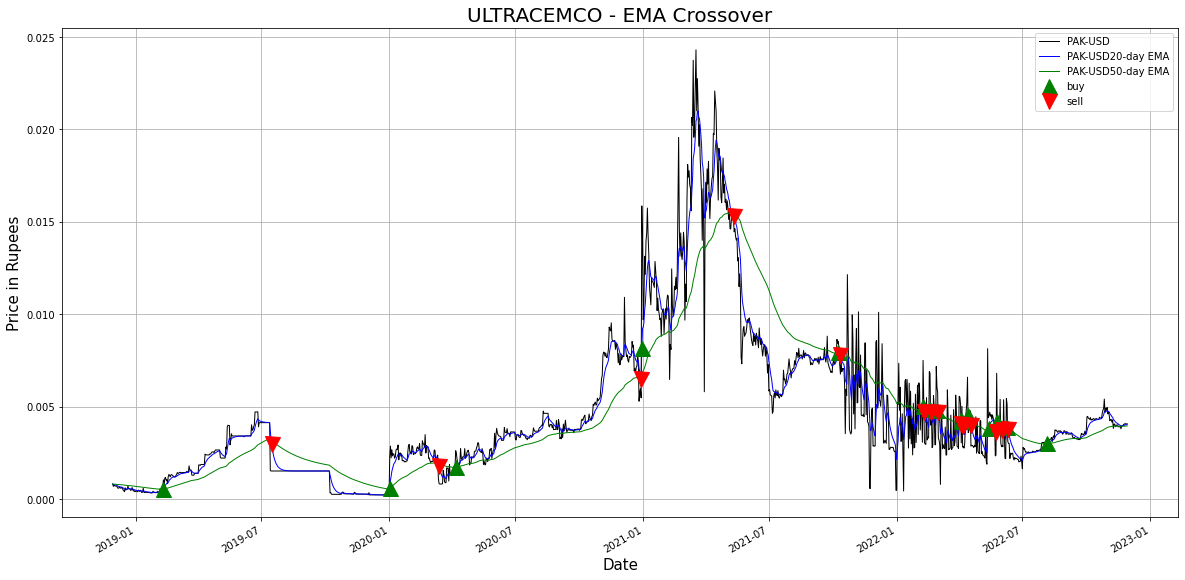

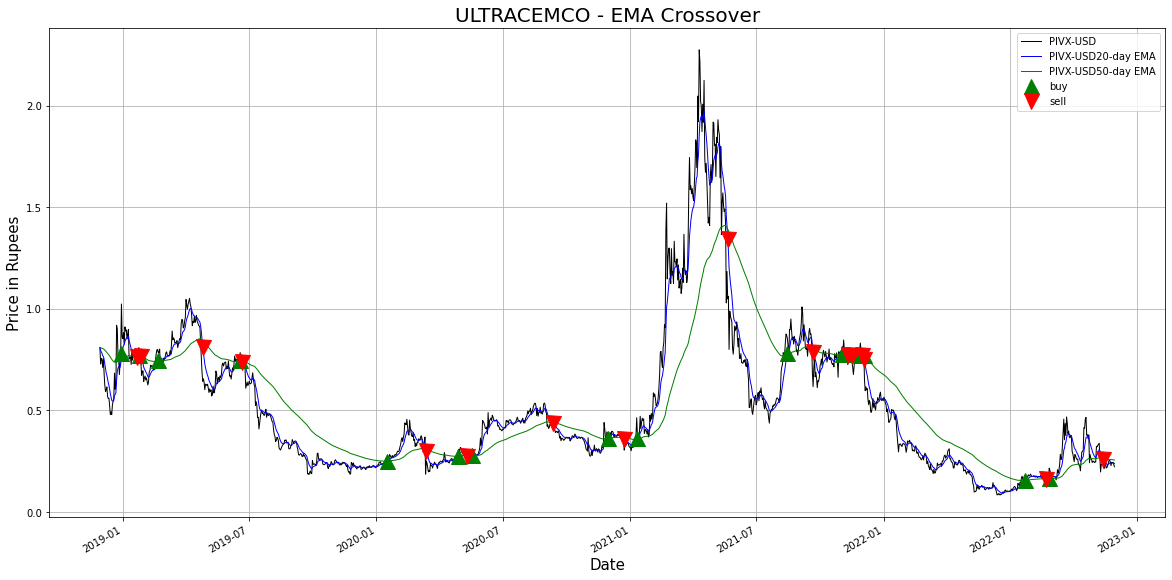

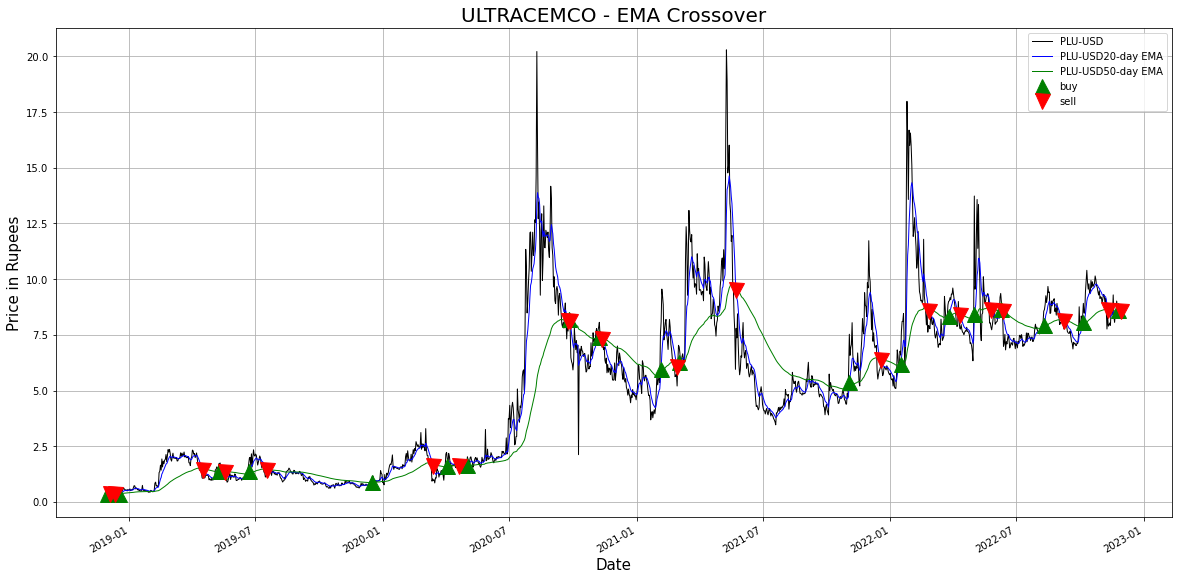

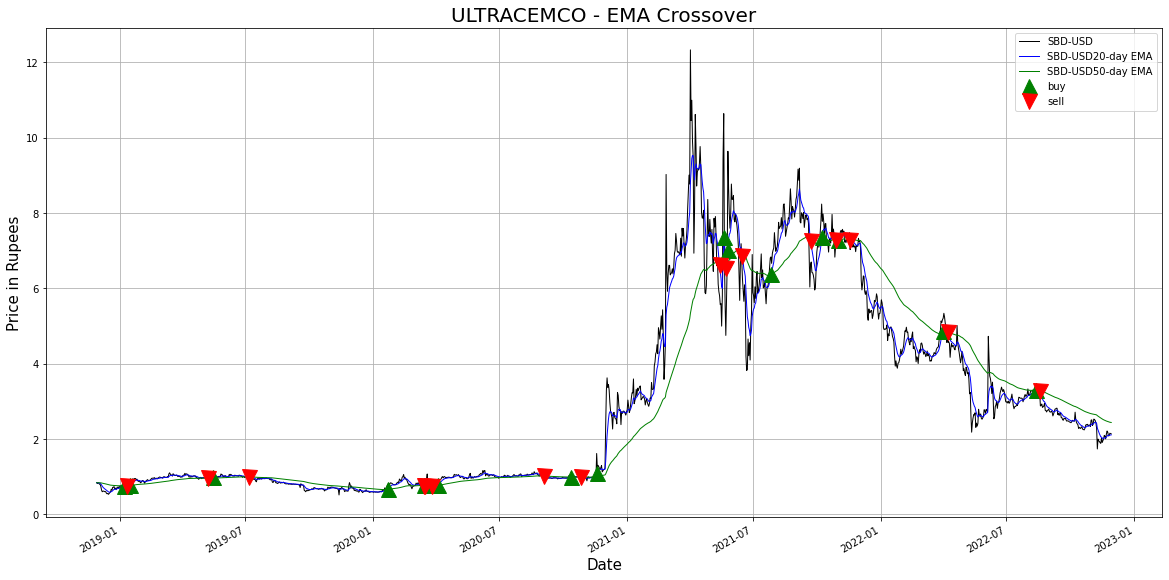

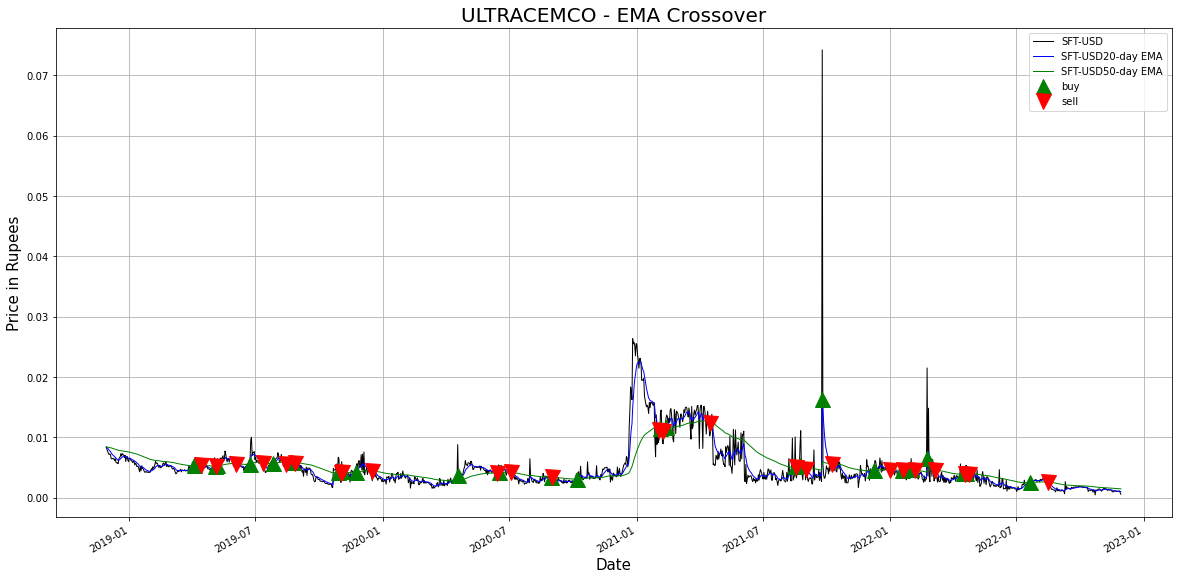

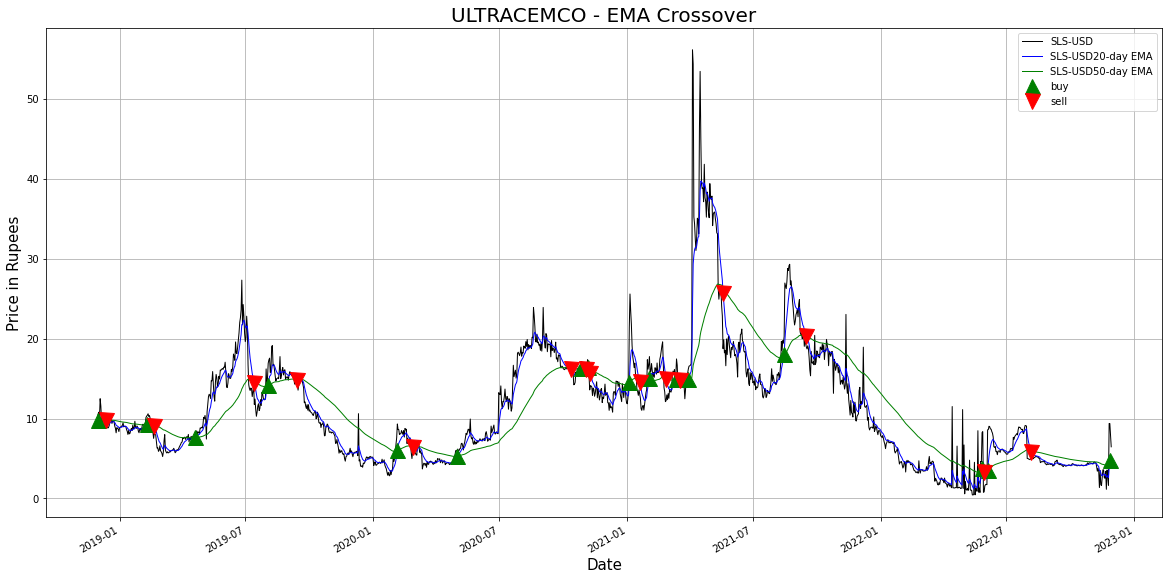

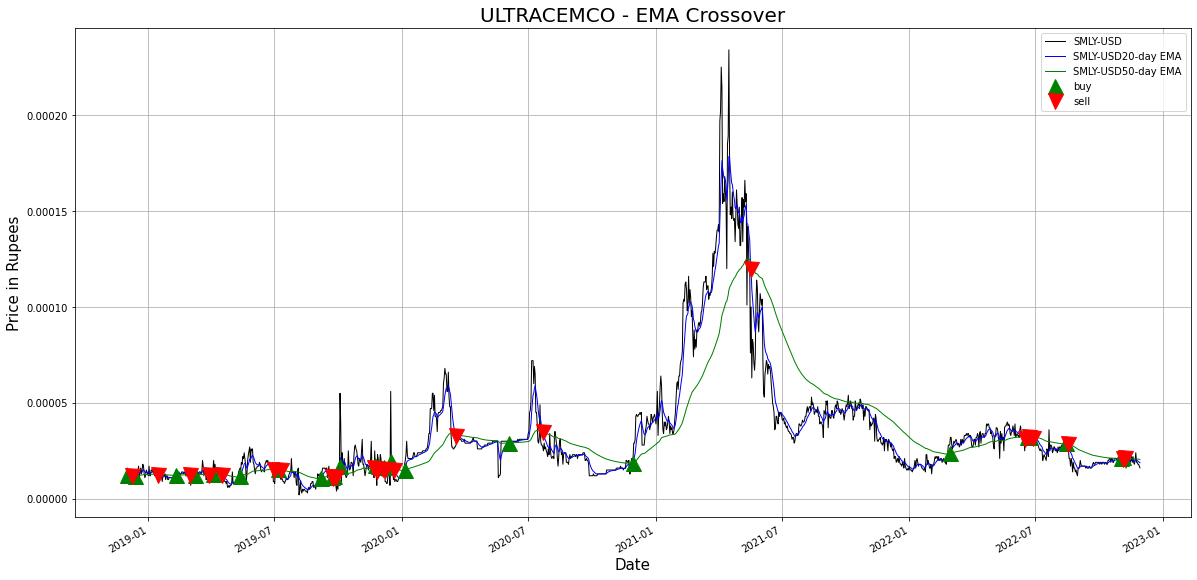

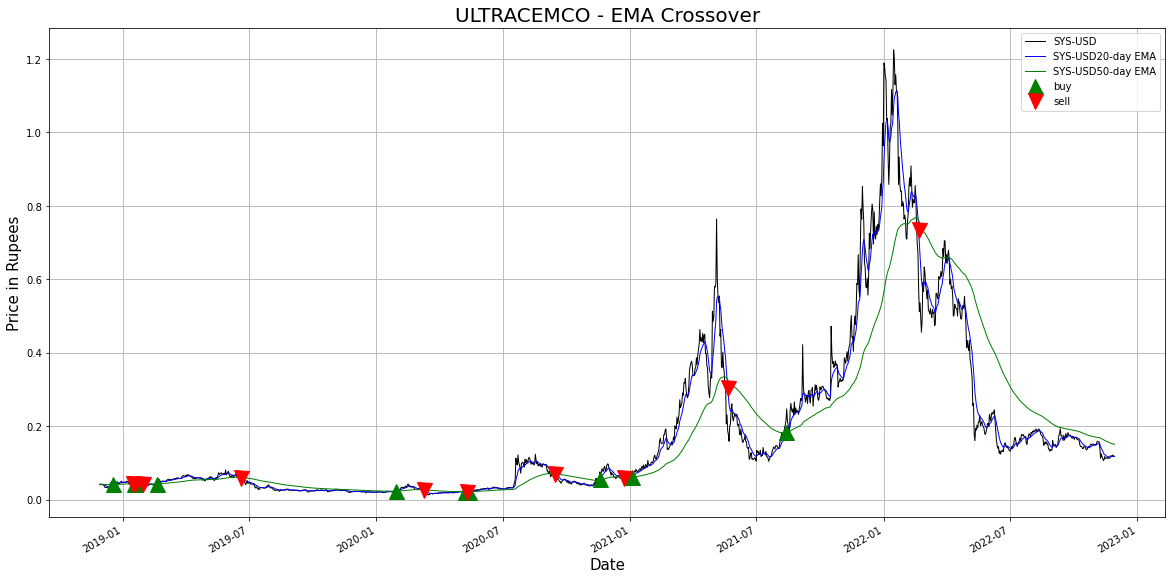

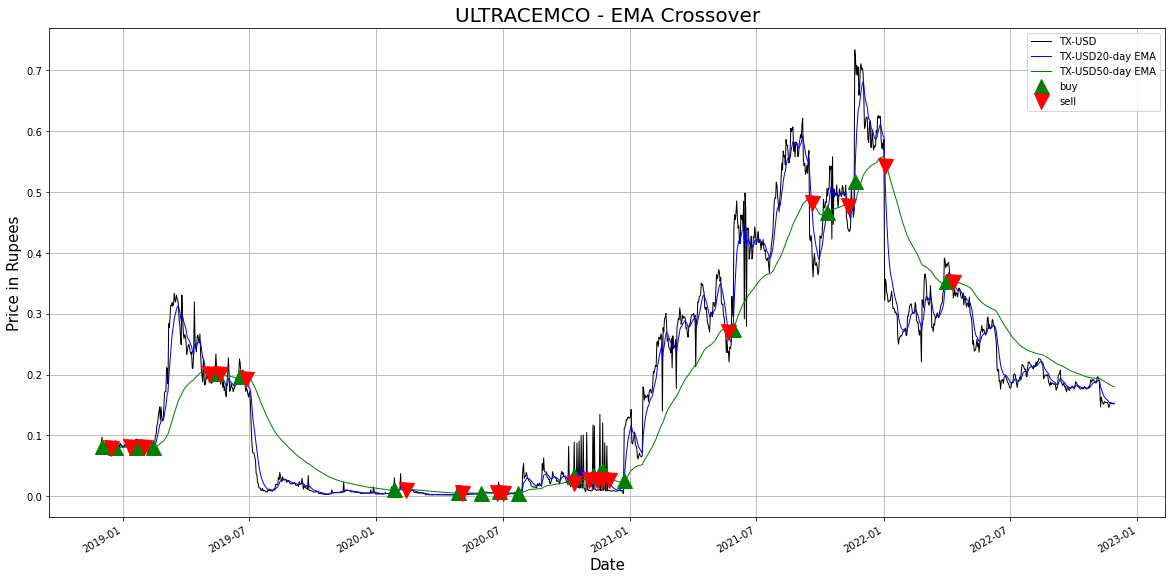

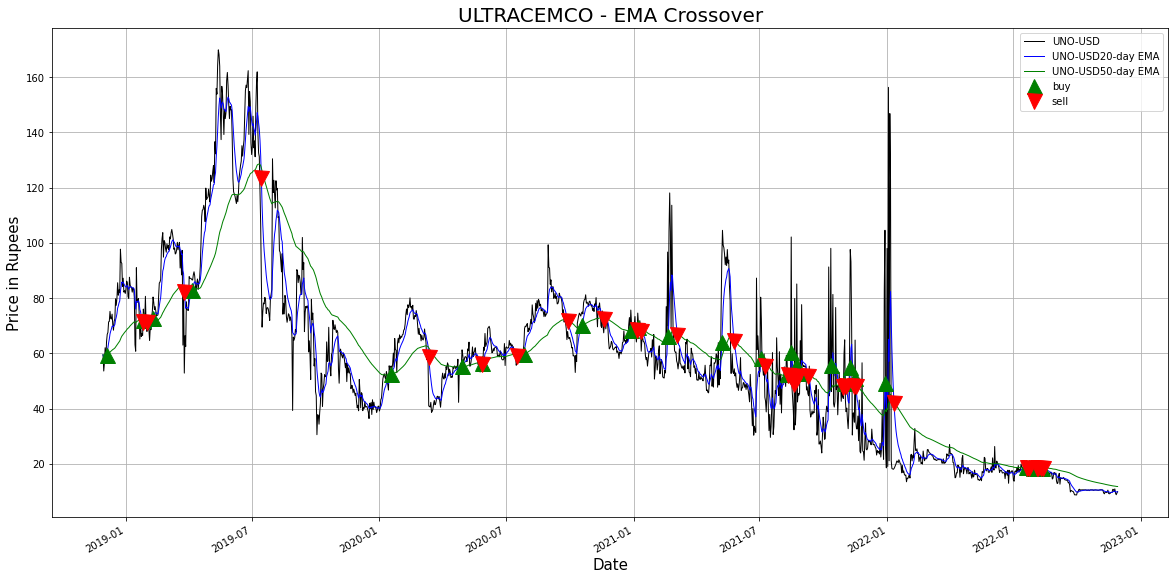

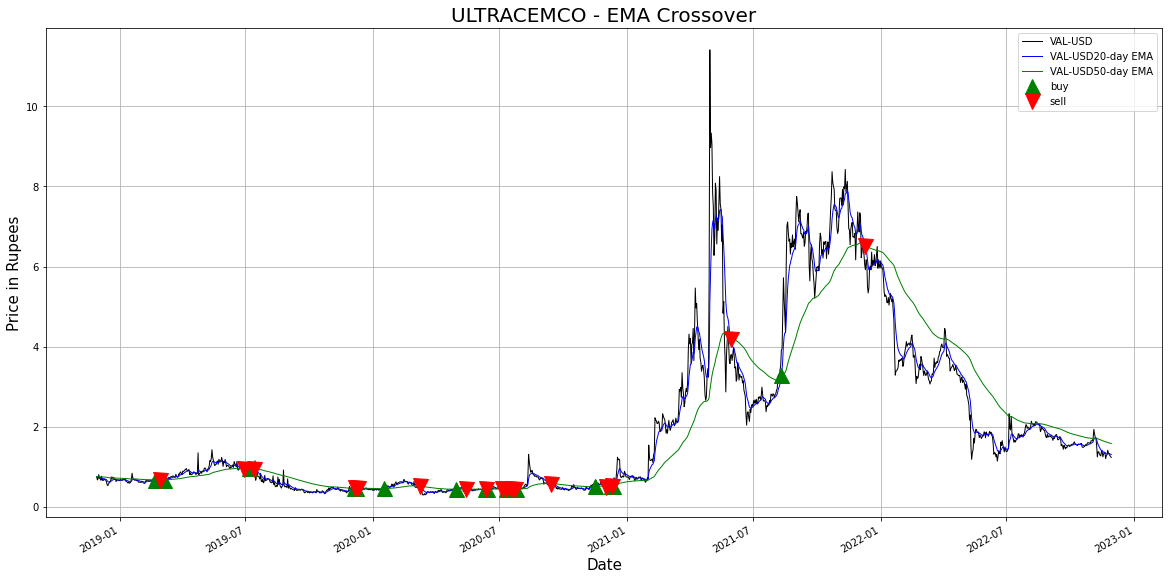

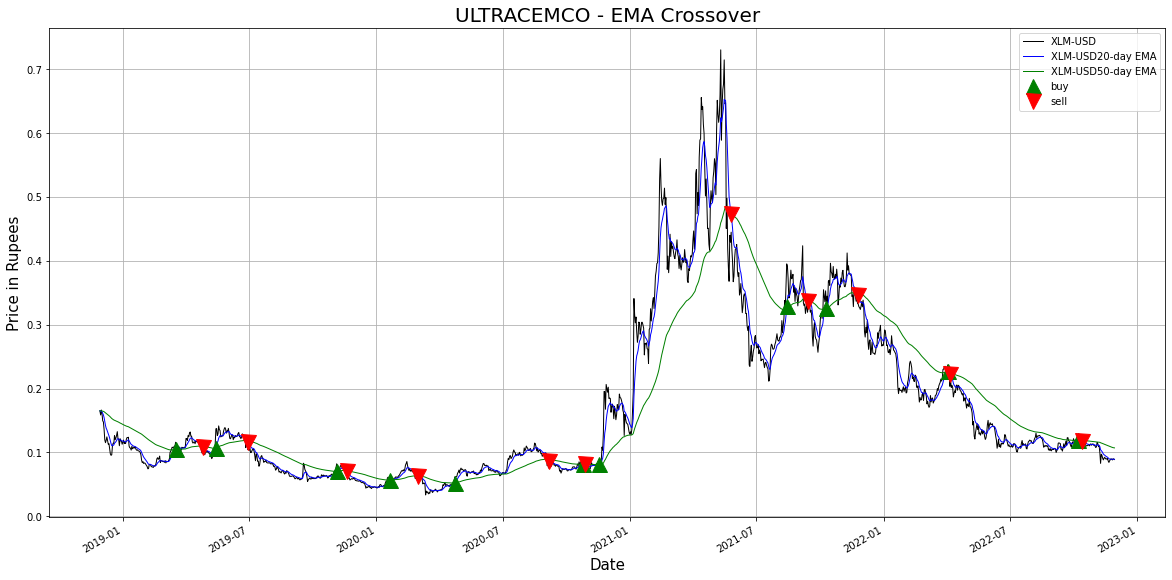

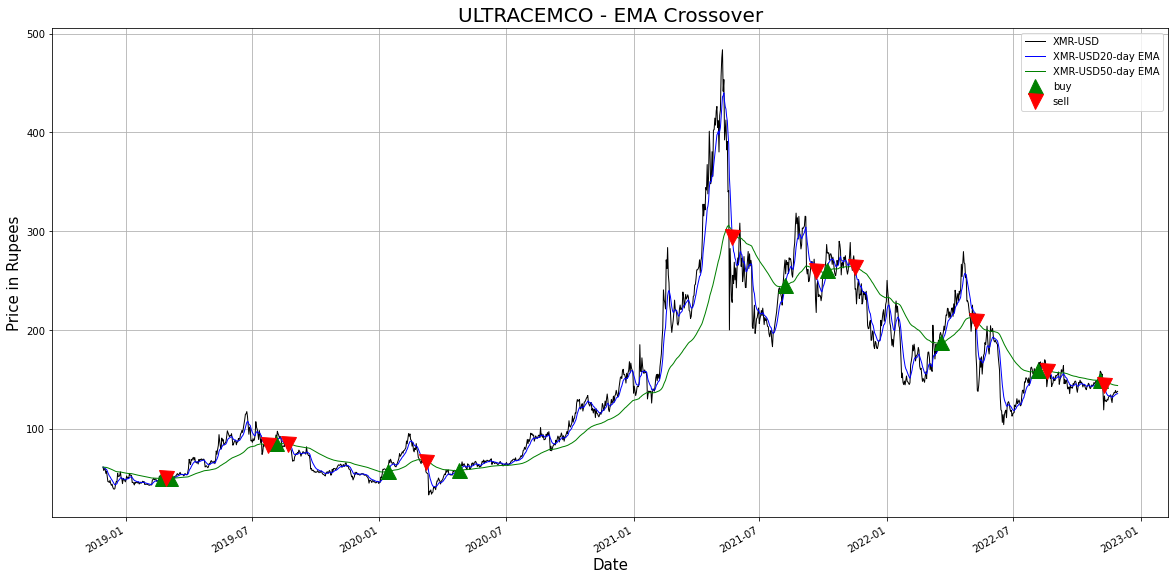

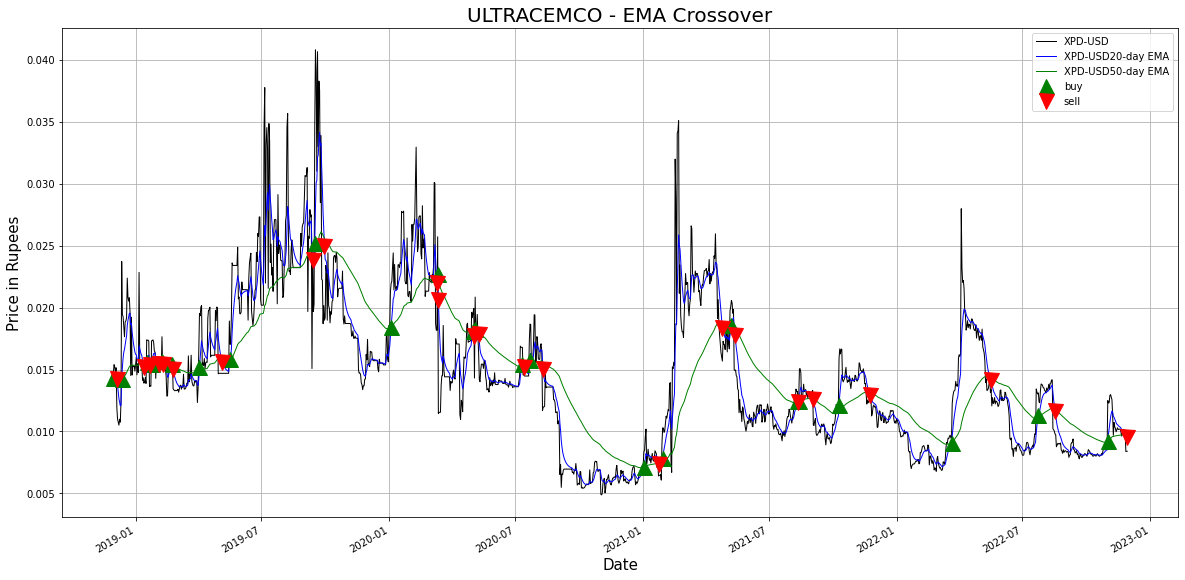

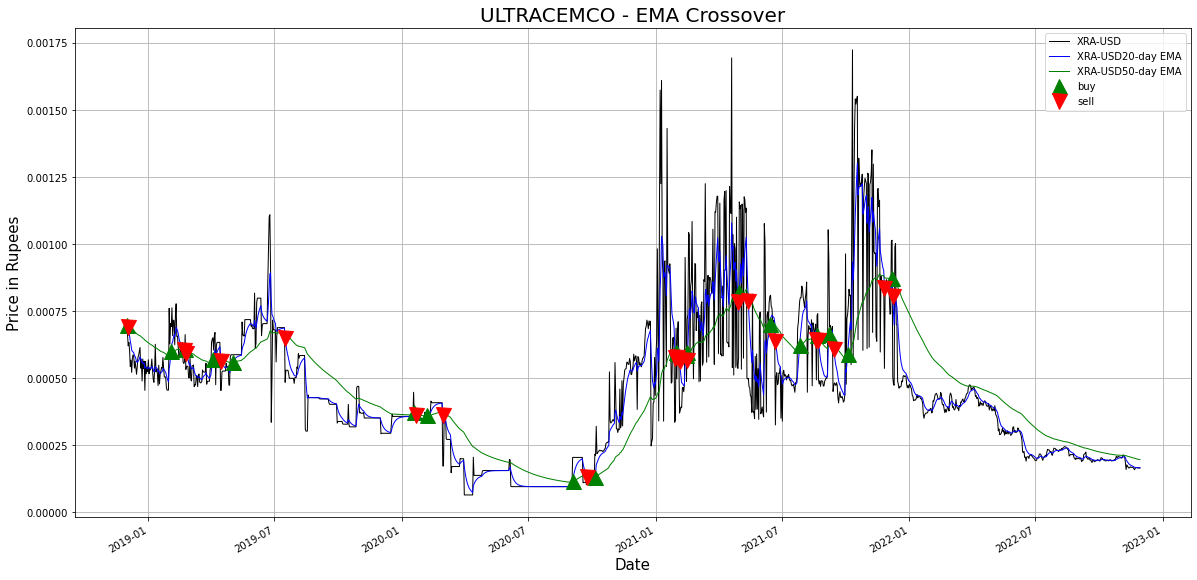

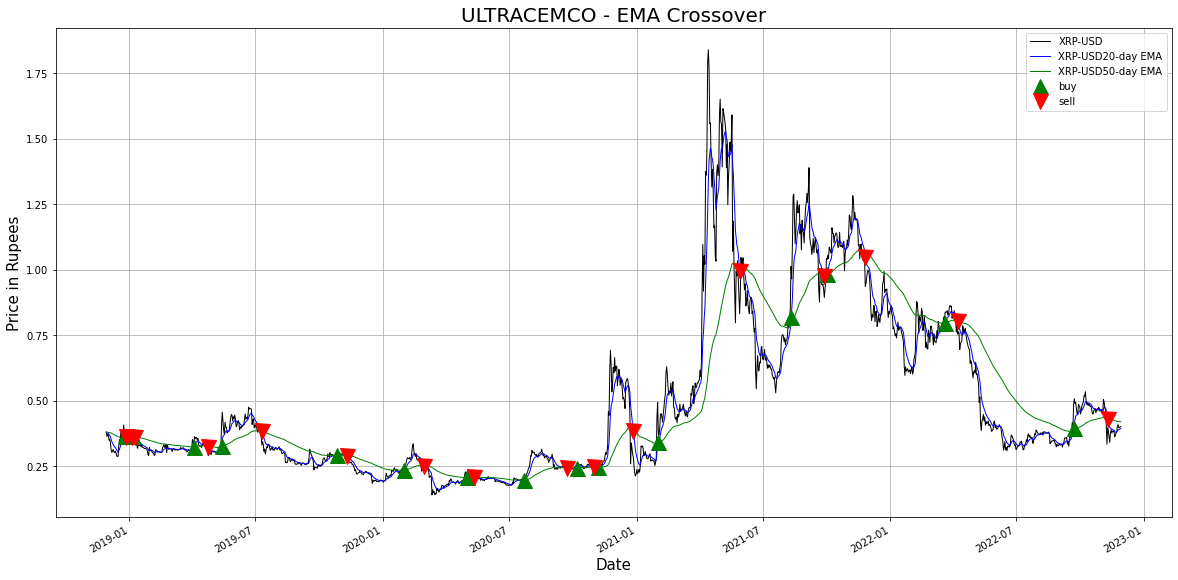

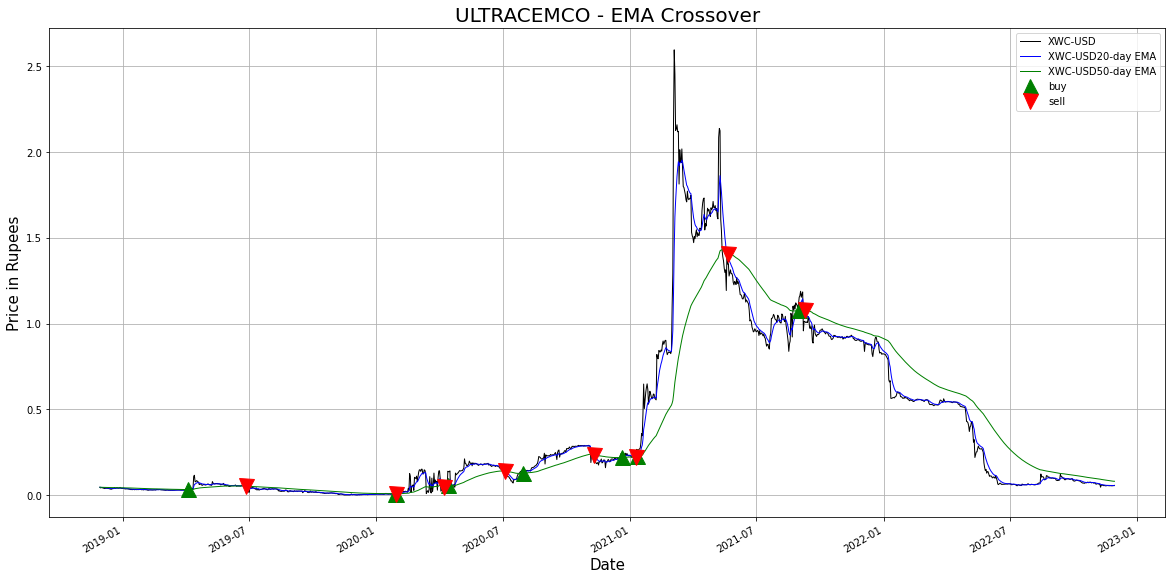

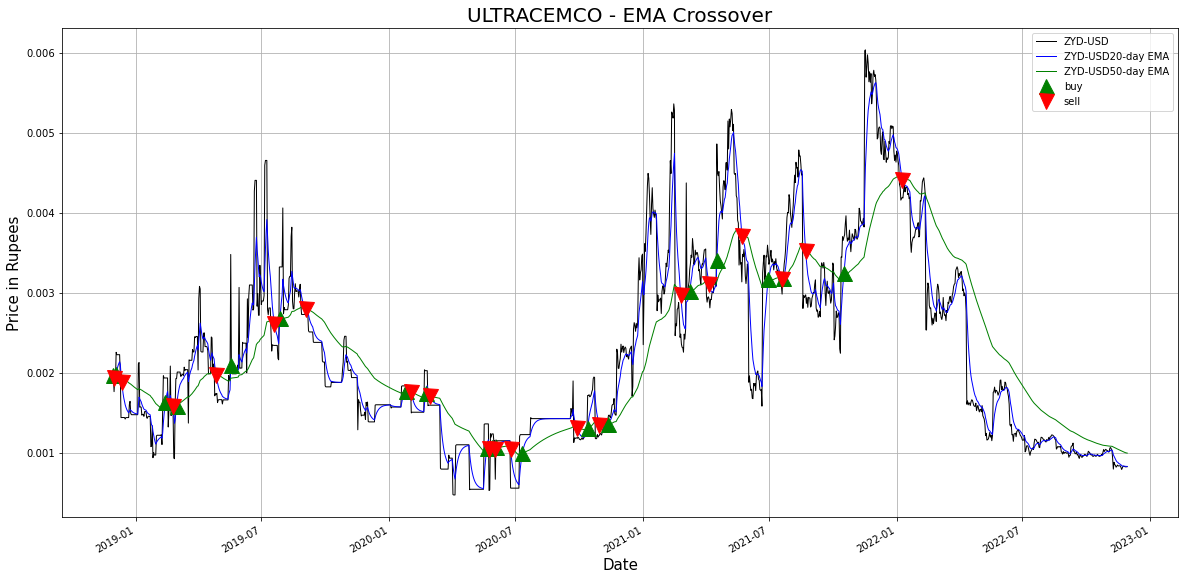

In [67]:
for name in names:
    plt.figure(figsize = (20,10))
    # plot close price, short-term and long-term moving averages 
    df[name].plot(color = 'k', lw = 1, label = name)  
    df[name+'20_EMA'].plot(color = 'b', lw = 1, label = name + '20-day EMA') 
    df[name+'50_EMA'].plot(color = 'g', lw = 1, label = name +'50-day EMA')
# plot ‘buy’ and 'sell' signals
    plt.plot(df[df[name + 'Position'] == 1].index, 
             df[name+'20_EMA'][df[name+'Position'] == 1], 
             '^', markersize = 15, color = 'g', label = 'buy')
    plt.plot(df[df[name+'Position'] == -1].index, 
             df[name+'20_EMA'][df[name+'Position'] == -1], 
             'v', markersize = 15, color = 'r', label = 'sell')
    plt.ylabel('Price in Rupees', fontsize = 15 )
    plt.xlabel('Date', fontsize = 15 )
    plt.title('ULTRACEMCO - EMA Crossover', fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
def __init__(self, symbol, bars, signals, initial_capital=2000000.0):
    self.symbol = symbol        
    self.bars = bars
    self.signals = signals
    self.initial_capital = float(initial_capital)
    self.positions = self.generate_positions()
        
def generate_positions(self):
    positions = pd.DataFrame(index=signals.index).fillna(0.0)
    positions[self.symbol] = 100*signals['signal']   # This strategy buys 100 shares
    return positions
                    
def backtest_portfolio(self):
    portfolio = self.positions*self.bars['Close']
    pos_diff = self.positions.diff()

    portfolio['holdings'] = (self.positions*self.bars['Close']).sum(axis=1)
    portfolio['cash'] = self.initial_capital - (pos_diff*self.bars['Close']).sum(axis=1).cumsum()

    portfolio['total'] = portfolio['cash'] + portfolio['holdings']
    portfolio['returns'] = portfolio['total'].pct_change()
    return portfolio

In [ ]:
def backtest(portfolio):
    
    ret = portfolio['return']
    networth = portfolio['net worth']
    
    def retn(networth):
        # accumulate return rate
        return networth[-1]-1

    def annualreturn(networth):
        # annual return rate
        period = len(networth)/252
        return networth[-1]**(1/period) - 1
    
    def sharpe(ret):
        # sharpe ratio
        return np.sqrt(252) * (ret.mean() - (0.05/252)) / ret.std()

    def volatility(ret):
        # volatility in the period
        return np.std(ret) * np.sqrt(252)
    
    def maxdrawdown(networth):
        # max drawdown in the period
        mdd = np.zeros_like(networth)
        for i in range(len(networth)-1):
            mdd[i] = (networth[i+1:].min() - networth[i]) / networth[i]
        return -mdd.min()
    
    res = [retn(networth), annualreturn(networth), sharpe(ret), volatility(ret), maxdrawdown(networth)]
    
    plt.figure(dpi=100)
    plt.plot(networth)
    plt.xlabel('Date')
    plt.ylabel('Net Worth')
    plt.title('Portfolio Return');
    plt.show()
    
    return res

In [ ]:
#refinement 2
names = ["BTC-USD","XRP-USD","ETH-USD","BCH-USD","ADA-USD","XEM-USD","LTC-USD","TRX-USD","XLM-USD","MIOTA-USD","DASH-USD","EOS-USD",
"XMR-USD","NEO-USD","QTUM-USD","BTG-USD","SC-USD","BCN-USD","ZEC-USD","XVG-USD","OMG-USD","BTS-USD","PPT-USD","DOGE-USD","DCN-USD","BNB-USD","SNT-USD","LINK-USD","USDC-USD","VET-USD"]
volatility_list = list()
for name in names:
    daily_volatility = pret[name].std()
    annual_volatility = math.sqrt(252) * daily_volatility 
    annual_volatility#0.589833
    volatility_list.append(annual_volatility)
volatility_list

In [46]:
#correlation with benchmark
table_2 = pd.DataFrame(pd.read_excel("/Users/yijunshen/benchmark.xls"), columns = ('Date','Adj Close'))
#table_2 = pd.read_csv("/Users/yijunshen/Benchmark.csv")
table_2.index = pd.to_datetime(table_2['Date'], format='%Y%m%d')
#table_2= table_2.iloc[50:]
table_2 = pd.DataFrame(table_2['Adj Close'])
table_2 = table_2.loc['2018-11-29':]
table_2

Adj Close
Date                 
2018-11-29     367.03
2018-11-30     348.57
2018-12-03     335.22
2018-12-04     337.32
2018-12-05     324.16
...               ...
2022-11-22    1362.45
2022-11-23    1421.13
2022-11-24    1426.18
2022-11-25    1424.52
2022-11-28    1399.41

[1043 rows x 1 columns]

In [53]:


#table_2 = yf.download("BTC-USD", period = '4y', interval = '1d')
returntablex = table_2.pct_change().dropna()
returntablex=pd.DataFrame(returntablex["Adj Close"], index = returntablex.index)

#create position:
table_2_signal = pd.DataFrame(index = table_2.index)
table_2_signal['20_EMA'] = table_2['Adj Close'].ewm(span = 20, adjust = False).mean()
table_2_signal['50_EMA'] = table_2['Adj Close'].ewm(span = 50, adjust = False).mean() 
table_2_signal['Signal'] = 0.0
table_2_signal['Signal'] = np.where(table_2_signal['20_EMA'] > table_2_signal['50_EMA'], 1.0, -1.0)
data = pd.DataFrame(table_2_signal['Signal'], index = table_2.index)
table_2_position = pd.DataFrame(data.iloc[:-1].values, index=data.index[1:],columns=data.columns)
table_2_position
#return
damn = pd.DataFrame(table_2_position['Signal'] * returntablex['Adj Close'], index = returntablex.index, columns = returntablex.columns)
damn
#correlation
#np.corrcoef(damn['Adj Close'], portfolio['return'])

Adj Close
Date                 
2018-11-30   0.050296
2018-12-03   0.038299
2018-12-04  -0.006265
2018-12-05   0.039013
2018-12-06   0.041955
...               ...
2022-11-22  -0.023337
2022-11-23  -0.043069
2022-11-24  -0.003554
2022-11-25   0.001164
2022-11-28   0.017627

[1042 rows x 1 columns]